In [1]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_images(images, titles, size=(10, 8)): 
    rows = math.ceil(len(images) / 4)
    fig=plt.figure(figsize=size, dpi=180)
    for i, img in enumerate(images):
        fig.add_subplot(rows, 4, i+1)
        plt.imshow(img, cmap='gray')            
        plt.axis('off')
        plt.title(titles[i], fontsize=8)
    plt.show()

In [3]:
def apply_exp(img, exp):
    return np.array(255*(img/255)**exp).astype('uint8')    

In [4]:
def normalize(img):
    Imax = np.max(img)
    Imin = np.min(img)
    k = 255 / (Imax - Imin)
    out = k * (img -  Imin)
    out = out.astype(np.uint8)
    return out

In [5]:
imgA = cv2.imread("skeleton.jpg")

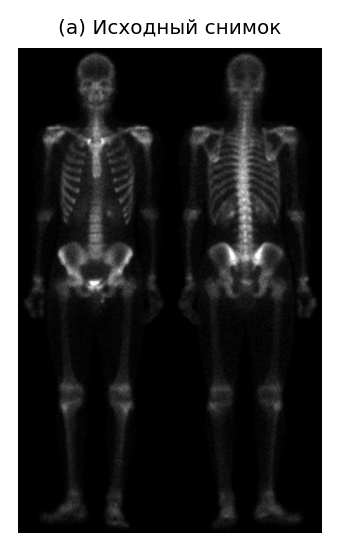

In [6]:
show_images([imgA], ['(а) Исходный снимок'])

Применение Лапласиана для выделения мелких деталей

In [7]:
image_laplas = cv2.Laplacian(imgA, cv2.CV_64F)

In [8]:
image_laplas_norm = normalize(image_laplas)

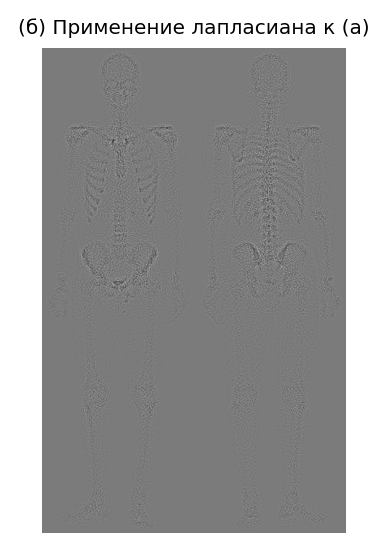

In [9]:
show_images([image_laplas_norm], ['(б) Применение лапласиана к (а)'])

Увеличие резкости добавлением лапласиана к исходному

In [28]:
img_sum = normalize(cv2.addWeighted(imgA, 1, image_laplas_norm, 1, 0))  #

In [29]:
#plt.hist(img_sum.flatten());

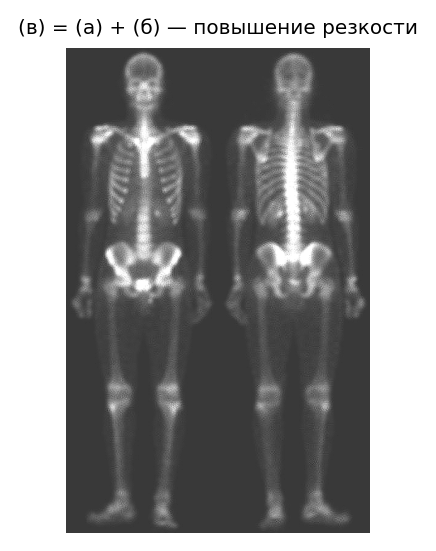

In [30]:
show_images([img_sum], ['(в) = (а) + (б) — повышение резкости'])

Выделение контуров с помощью градиента

In [31]:
sobelx = cv2.convertScaleAbs(cv2.Sobel(imgA, cv2.CV_64F, 1, 0))
sobely =  cv2.convertScaleAbs(cv2.Sobel(imgA, cv2.CV_64F, 0, 1))
sobel = cv2.addWeighted(sobelx, 1, sobely, 1, 1)

In [32]:
#plt.hist(cv2.Sobel(imgA, cv2.CV_64F, 1, 0).flatten())

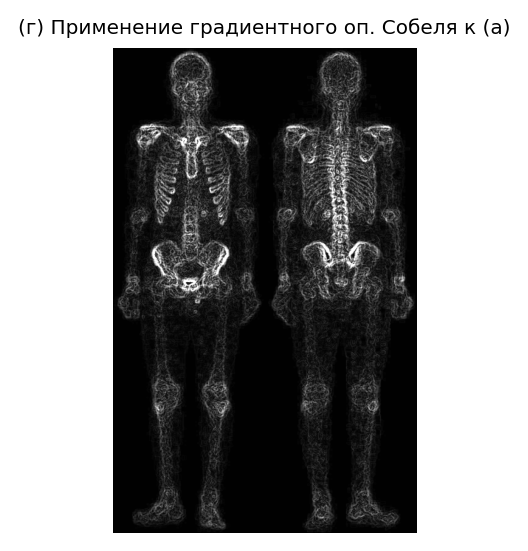

In [33]:
show_images([sobel], ['(г) Применение градиентного оп. Собеля к (а)'])

Сглаженное градиентное изображение (фильтром 5*5). Снижение шума

In [34]:
img_mean = cv2.blur(sobel, (5,5))

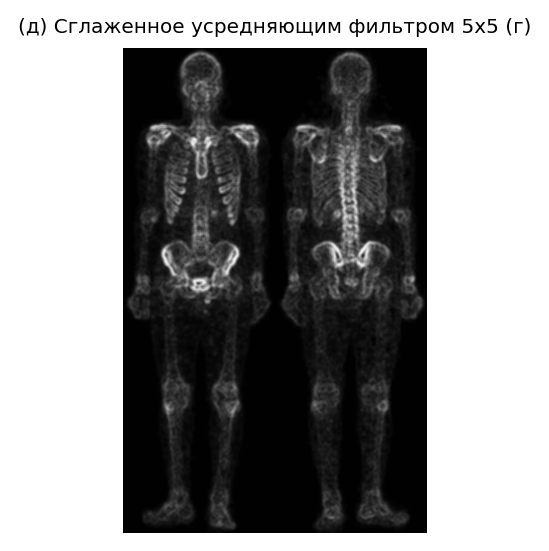

In [35]:
show_images([img_mean], ['(д) Сглаженное усредняющим фильтром 5х5 (г)'])

Перемножение лапласиана и сглаженного градиента. Преобладание резких контуров и относительное снижение шума

In [47]:
img_mean_and_sum = cv2.bitwise_and(img_mean, img_sum)

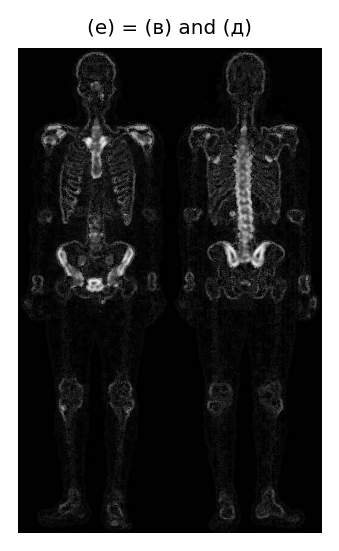

In [48]:
show_images([img_mean_and_sum], ['(е) = (в) and (д)'])

Прибавление полученного изображения к исходному. Повышение резкости (видно на ребрах, позвоночнике, черепе)

In [38]:
orig_plus_mask = cv2.addWeighted(imgA, 1, img_mean_and_sum, 0.5, 0)

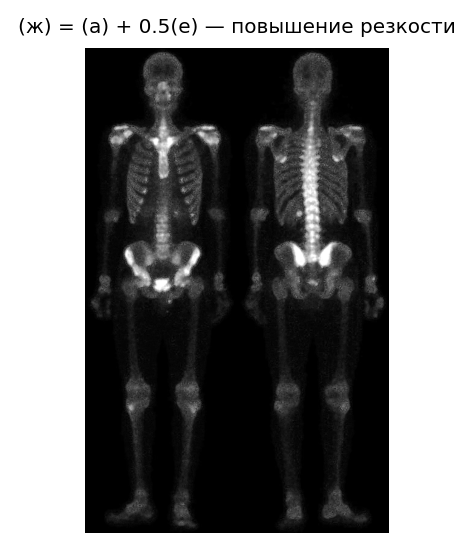

In [39]:
show_images([orig_plus_mask], ['(ж) = (а) + 0.5(e) — повышение резкости'])

Увеличение динамического диапазона яркости путем степенного преобразования y=x^0.5

In [40]:
result = apply_exp(orig_plus_mask, 0.4)

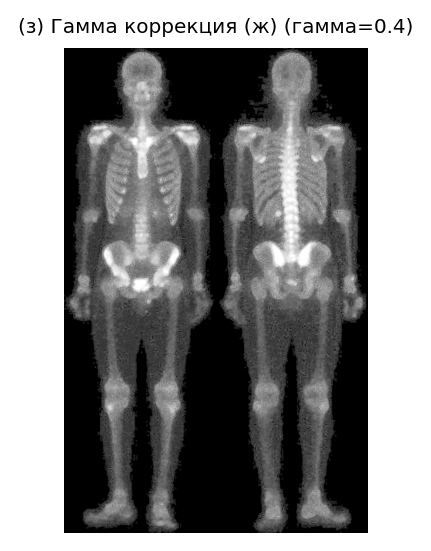

In [41]:
show_images([result], ['(з) Гамма коррекция (ж) (гамма=0.4)'])

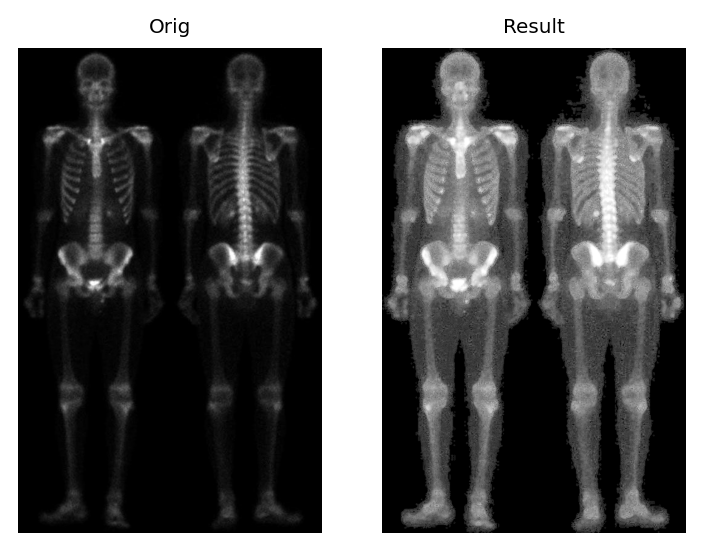

In [42]:
show_images([imgA, result], ['Orig', 'Result'])

In [43]:
imgs = [imgA, image_laplas_norm, img_sum, sobel, img_mean, img_mean_and_sum, orig_plus_mask, result]
titles = [
    '(а) Исходный', 
    '(б) Лапласиан к (а)', 
    '(в) = (а) + (б)', 
    '(г) Собель к (а)',
    '(д) Сглаживание 5х5 (г)', 
    '(е) = (в) and (д)', 
    '(ж) = (а) + 0.5(e)', 
    '(з) Гамма коррекция (ж)'
]

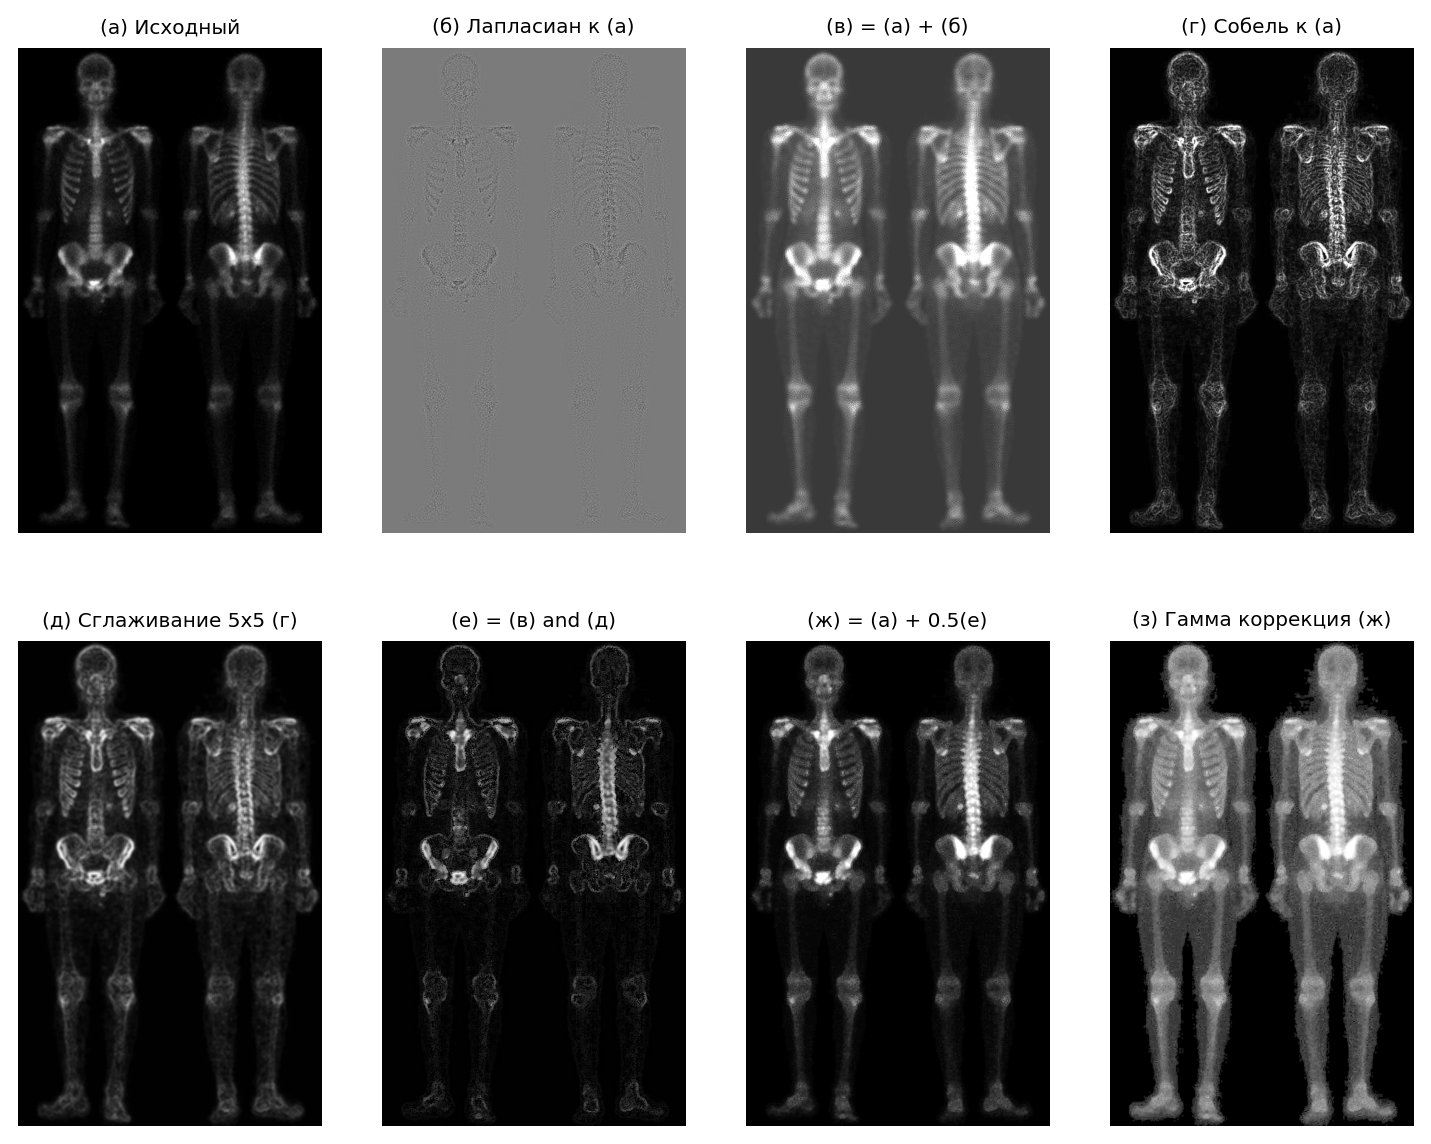

In [44]:
show_images(imgs, titles)